<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/4-1%20%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **로지스틱 회귀**

## **데이터 준비**

데이터를 준비하겠습니다.

In [4]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

print(fish.head())
print()
print(fish.info())

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB
None


판다스의 `unique()` 메서드를 사용하여 생선 종류에 대한 고유값을 출력하겠습니다.

In [5]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


생선 종류를 예측하고 분류하는 문제입니다. 'Species' 열을 제외한 나머지 열 5개를 입력 데이터로 만들고, 'Species' 열을 타깃으로 만들겠습니다. 참고로 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 **다중 분류(multi-class classification)**라고 합니다. **이진 분류(binary classification)**에서는 양성 클래스와 음성 클래스를 1과 0으로 지정하여 데이터를 만들었으나, 사이킷런에서는 문자열로 된 타깃 값을 그대로 사용할 수 있습니다.

In [8]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

print(f'fish_input[:5]:\n {fish_input[:5]}')
print()
print(f'fish_target[:5]:\n {fish_target[:5]}')

fish_input[:5]:
 [[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]

fish_target[:5]:
 [['Bream']
 ['Bream']
 ['Bream']
 ['Bream']
 ['Bream']]


훈련 세트와 테스트 세트로 나누겠습니다.

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

표준화 전처리하겠습니다. 참고로 `train_input` 하나만 훈련하면 됩니다.

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## **k-최근접 이웃 분류기**

### **k-최근접 이웃 분류기의 확률 예측**

먼저 `KNeighborsClassifier` 클래스 객체로 훈련 세트를 훈련하고 점수를 확인하겠습니다.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(f'훈련 세트 점수:   {kn.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {kn.score(test_scaled, test_target)}')

훈련 세트 점수:   0.8907563025210085
테스트 세트 점수: 0.85


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


타깃값을 그대로 사이킷런 모델에 적용하면 `pd,unique(fish['Species'])`로 출력했던 순서와 다르게 자동으로 알파벳 순으로 정렬됩니다. 정렬된 타깃값은 `classes_` 속성에 저장됩니다.

In [14]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


생선 순서가 본래 타깃값과 다르게 정렬됐습니다. 다만 `predict()` 메서드에 `test_scaled` 값을 넣으면 타깃값으로 예측을 출력합니다.

In [15]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


`predict_proba()` 메서드를 사용하여 클래스별 확률값을 출력하겠습니다. 

In [28]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])

print(f'저장된 속성 순서: {kn.classes_}')
print()
print(f'클래스별 확률값:\n{np.round(proba, 4)}')
print()
print(f'예측값: {kn.predict(test_scaled[:5])}')

저장된 속성 순서: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

클래스별 확률값:
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]

예측값: ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


`kn.classes_` 속성에 저장된 값의 순서로서 첫 번째 열은 'Bream'에 대한 확률값, 두 번째 열은 'Parkki'에 대한 확률값을 의미합니다. 첫 번째 샘플은 세 번째 속성인 'Perch'의 확률값이 1이므로 'Perch'라고 예측했습니다. 네 번째 샘플은 세 번째 속성인 'Perch'의 확률값이 0.6667이고, 다섯 번째 속성인 'Roach'의 확률값이 0.3333이므로 확률값이 더 높은 'Perch'로 예측했습니다.

예측이 얼마나 맞는지 일일이 출력해 보겠습니다. 네 번째 샘플의 최근접 이웃의 클래스를 확인하겠습니다.

In [30]:
indexes

array([[104, 115, 106]])

In [29]:
distance, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[[['Roach']
  ['Perch']
  ['Perch']]]


'Perch'가 최근접 이웃 3개 중 2개와 인접하여 'Perch'로 예측했습니다. 'Roach'는 1개만 인접하므로 기각됐습니다. 최근접 이웃 3개만 사용하므로 가능한 확률값은 $0/3$ ~ $3/3$입니다.

## **로지스틱 회귀(Logistic regression)**

- 이름만 회귀이고 분류 모델임.

- 반복적인 알고리즘을 사용함.

  - `max_iter`: 반복 횟수를 지정하는 매개변수. 기본값은 `100`.

- 릿지 회귀처럼 계수의 제곱을 규제함(L2 규제).

  - `C`: 규제를 제어하는 매개변수. `alpha`와 반대로 값이 작을수록 규제가 커짐. 기본값은 `1`.

- L2 규제(릿지 방식)과 L1 규제(라쏘 방식)을 선택할 수 있음.

  - `penalty`: 규제 방식을 선택하는 매개변수. 기본값은 `l2`.

- 사용할 알고리즘을 선택할 수 있음.

   - `solver`: 사용할 알고리즘을 선택하는 매개변수. 기본값은 `lbfgs`. 확률적 평균 경사 하강법인 `saga` 를 선택할 수 있음. 

- 선형 회귀와 동일하게 선형 방정식을 학습함.

  - E.g. $z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f$

  - a, b, c, d, e는 '가중치(계수)', f는 '절편'.

  - 이진 분류의 경우 '로지스틱 함수(Logistic function)' = '시그모이드 함수(Sigmoid function)'를 사용함.

   확률인 0 ~ 1 사이 값으로 만들기 위해 사용함.

   $1 / 1 + e^-z$ (선형 방정식의 출력 z의 음수를 사용하여 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취함)
  
   z가 아주 큰 음수일 때 0, 아주 큰 양수일 때 1에 가까워짐.

   z가 0일 때는 0.5가 됨.

  - 다중 분류의 경우 '소프트맥스(Softmax)' = '정규화된 지수 함수'를 사용함.

   아래에서 상세하게 설명함.

[1.48413159e+02 1.34289780e+02 1.21510418e+02 1.09947172e+02
 9.94843156e+01 9.00171313e+01 8.14508687e+01 7.36997937e+01
 6.66863310e+01 6.03402876e+01 5.45981500e+01 4.94024491e+01
 4.47011845e+01 4.04473044e+01 3.65982344e+01 3.31154520e+01
 2.99641000e+01 2.71126389e+01 2.45325302e+01 2.21979513e+01
 2.00855369e+01 1.81741454e+01 1.64446468e+01 1.48797317e+01
 1.34637380e+01 1.21824940e+01 1.10231764e+01 9.97418245e+00
 9.02501350e+00 8.16616991e+00 7.38905610e+00 6.68589444e+00
 6.04964746e+00 5.47394739e+00 4.95303242e+00 4.48168907e+00
 4.05519997e+00 3.66929667e+00 3.32011692e+00 3.00416602e+00
 2.71828183e+00 2.45960311e+00 2.22554093e+00 2.01375271e+00
 1.82211880e+00 1.64872127e+00 1.49182470e+00 1.34985881e+00
 1.22140276e+00 1.10517092e+00 1.00000000e+00 9.04837418e-01
 8.18730753e-01 7.40818221e-01 6.70320046e-01 6.06530660e-01
 5.48811636e-01 4.96585304e-01 4.49328964e-01 4.06569660e-01
 3.67879441e-01 3.32871084e-01 3.01194212e-01 2.72531793e-01
 2.46596964e-01 2.231301

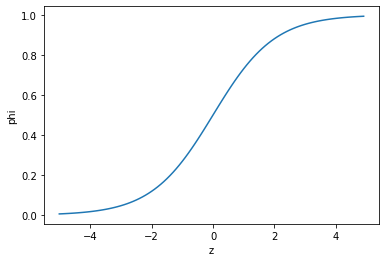

In [ ]:
# '시그모이드 함수'를 나타내는 그래프를 그림.
# -5 ~ 5 사이를 0.1 간격으로 정하여 배열 z를 만들고, 다음 z 위치마다 시그모이드 함수를 계산함.
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1) # -5 ~ 5 범위를 0.1 간격으로 만듦.

phi = 1 / (1 + np.exp(-z)) # `np.exp()`: 지수 함수를 계산함.
print(np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### **이진 분류 수행하기**

- 이진 분류일 경우 '시그모이드 함수'의 출력이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스임.

 (사이킷런의 경우 0.5는 음성 클래스로 판단함)

#### **불리언 인덱싱으로 특정 샘플 고르기**

 - 불리언 인덱싱(Boolean indexing): True와 False로 구성된 1차원 배열을 활용하여 True에 해당하는 행을 선택함.

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D' ,'E'])
print(char_arr[[True, False, True, False, False]])
# True를 전달한 배열에 속한 원소를 출력함.

['A' 'C']


In [ ]:
# '불리언 인덱싱'을 사용하여 도미(Bream)와 빙어(Smelt) 행만 골라냄.
# Bream인 행과 Smelt인 행을 비교 연산자인 OR(|)을 사용하여 합쳐서 True로 출력함.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
# True와 False로 이루어진 (119, 1)이라는 2차원 리스트가 만들어짐. 2차원 배열로는 불리언 인덱싱을 할 수 없음.
# 2차원 배열이 만들어지는 이유는 잘 모르겠음. 어쨌든 1차원(119,)으로 줄여야 함.
bream_smelt_indexes = bream_smelt_indexes.reshape(-1) # `bream_smelt_indexes.flatten()`과 `bream_smelt_indexes.ravel()`도 1차원으로 줄이는 함수임.
print(bream_smelt_indexes)

# 골라 낸 행(True)을 훈련 세트에 전달하여 Bream과 Smelt만 따로 훈련해 봄.
train_bream_smelt = train_scaled[bream_smelt_indexes] # 인덱싱이므로 '[]'를 사용해야 함. '()'는 적용되지 않음.
target_bream_smelt = train_target[bream_smelt_indexes]
print(train_bream_smelt)
print(target_bream_smelt)

[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.703142

#### **로지스틱 회귀 모델 훈련하기**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

print(lr.classes_)
# 이진 분류이므로 알파벳순인 Bream이 음성 클래스(0), Smelt가 양성 클래스(1)임.
# Bream을 양성 클래스로 사용하려면 Bream의 타깃값을 1로 만들고 나머지는 0으로 만들면 됨.

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### **시그모이드 함수에 적용하여 확률 얻기**

In [ ]:
# 로지스틱 회귀가 학습한 '계수'를 확인함.
print(lr.coef_, lr.intercept_)
# z = -0.404 * Weight - 0.576 * Length - 0.663 * Diagonal - 1.013 * Height - 0.732 * Width - 2.161

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# `decision_function()` 메서드로 양성 클래스에 대한 z값을 출력함.
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# z값을 '시그모이드 함수'에 적용하여 확률을 얻음.
from scipy.special import expit # expit(): 시그모이드 함수. 1 / (1 + np.exp(-z))보다 편리하고 안전함.
print(expit(decisions))
# `predict_proba()` 메서드가 출력한 두 번째 열의 값(양성 클래스)과 동일함.

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### **다중 분류 수행하기**

#### **로지스틱 회귀 모델 훈련하기**

In [ ]:
# 이진 분류 과정과 크게 다르지 않음.
lr = LogisticRegression(C = 20, max_iter = 1000) # 규제를 완화하고자 `C`를 '20'으로 늘리고, 충분히 훈련하고자 `max_iter`를 '1000'으로 늘림.
lr.fit(train_scaled, train_target) # 이진 분류와 달리 7개 생선 데이터를 사용함.

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(lr.predict(test_scaled[:5]))

proba = lr.predict_proba(test_scaled[:5])
print(proba)
print(np.round(proba, decimals = 3))

print(lr.classes_) # 첫 번째 예측의 경우 0.841로 Perch로 예측함.

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[7.24997035e-06 1.35120247e-02 8.41274752e-01 3.14318278e-04
  1.35668463e-01 6.67127629e-03 2.55191550e-03]
 [7.15098082e-09 2.55595742e-03 4.39087249e-02 3.37993009e-05
  7.31059778e-03 9.46185658e-01 5.25557023e-06]
 [1.86557390e-05 2.79656281e-06 3.40599281e-02 9.34804690e-01
  1.50477398e-02 1.60365274e-02 2.96620003e-05]
 [1.09325104e-02 3.40496773e-02 3.05542864e-01 6.60897368e-03
  5.66578556e-01 6.87249396e-05 7.62186940e-02]
 [4.48987235e-06 3.67288298e-04 9.04002989e-01 2.41270143e-03
  8.94740262e-02 2.40965058e-03 1.32885484e-03]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


##### **소프트맥스 함수에 적용하여 확률 얻기**

In [ ]:
print(lr.coef_, lr.intercept_)
# 특성 5개를 사용하므로 `coef_`의 열은 5개임.
# 행이 7개(클래스 7개)인 건 z를 7개 계산한다는 의미임. 다중 분류는 클래스마다 z값을 하나씩 계산함.
# 가장 높은 z값을 출력하는 클래스가 예측 클래스(예측한 값, 타깃)가 됨.
# 이진 분류는 '시그모이드 함수'를 사용하여 하나의 선형 방정식의 출력값(z)을 0 ~ 1 사이(확률)로 압축했지만,
# 다중 분류는 '소프트맥스(softmax) 함수'를 사용하여 여러 개의 선형 방정식의 출력값(z)을 0 ~ 1 사이(확률)로 압축함.
# 지수 함수를 사용하므로 '정규화된 지수 함수'라고도 함.

# z값 7개의 이름을 z1 ~ z7로 붙임.
# z1 ~ z7 값을 사용하여 지수 함수 e^z1 ~ e^z7을 계산하여 모두 더함. 이를 e_sum으로 정함.
# e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7

# 그리고 나서 e^z1 ~ e^z7을 각각 e_sum으로 나눔.
# s1 = e^z1 / e_sum
# s2 = e^z2 / e_sum
# .
# .
# .
# s7 = e^z7 / e_sum

# 마지막으로 s1 ~ s7까지 더하면 분자와 분모가 같아지면서 1이 됨. 즉 생선 7개의 확률 합은 1임.

[[-1.49002911 -1.02919221  2.59351113  7.70354318 -1.20068079]
 [ 0.19619256 -2.0106062  -3.77982687  6.50490143 -1.99486463]
 [ 3.56278472  6.34361428 -8.48973364 -5.75756295  3.79309039]
 [-0.10458533  3.60316654  3.93067417 -3.61731229 -1.75070607]
 [-1.40059104 -6.07505264  5.25967743 -0.87222909  1.86043657]
 [-1.38528628  1.49217379  1.3922839  -5.67732641 -4.40095877]
 [ 0.62151448 -2.32410356 -0.90658611  1.71598614  3.69368329]] [-0.09204845 -0.26290731  3.25101057 -0.14742485  2.65496057 -6.78780765
  1.38421712]


In [ ]:
# `decision_function()` 메서드로 z1 ~ z7 의 값을 구하고 소프트맥스 함수를 사용하여 확률로 바꿈.
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax

proba = softmax(decision, axis=1) # `axis` 매개변수를 1로 지정하여 각 행(샘플)에 대해 계산함. 그렇지 않으면 배열 전체에 대해 소프트맥스를 계산함.
print(np.round(proba, decimals=3))
# 위에서 lr로 훈련하고 `predict_proba`로 예측한 결과와 같은 값을 출력함.

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
